# Exposys Data Labs Internship

**Project On:** Diabetes Prediction Using Machine Learning Algorithms

**Made By:** Aman Rajput

**Domain:** Data Science  

**Dataset Link:** https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/data


***Import Needed Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

***Loading the Dataset***

In [ ]:
df = pd.read_csv("Healthcare-Diabetes.csv")

In [ ]:
display(df.head())
display(df.info())
display(df.describe())

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


None

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


***Data Cleaning***

In [ ]:
# Check for missing values
print(df.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Dropping the 'Id' column
df = df.drop(columns=["Id"])

In [ ]:
# Check for duplicate rows
print(df.duplicated().sum())

1990


In [ ]:
# Show the number of unique observations for each column
print(df.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64


***Exploratory Data Analysis (EDA)***

In [ ]:
# Basic dataset information
print(df.shape)
print(df.describe())
print(df.dtypes)

(2768, 9)
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2768.000000               2768.000000  2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225     0.343931  
std       8.076127                  0.325669    11.777230     0.4751

In [ ]:
# Analyzing the target column
print(df['Outcome'].unique())
print(df['Outcome'].value_counts())

[1 0]
Outcome
0    1816
1     952
Name: count, dtype: int64


***Data Visualization***

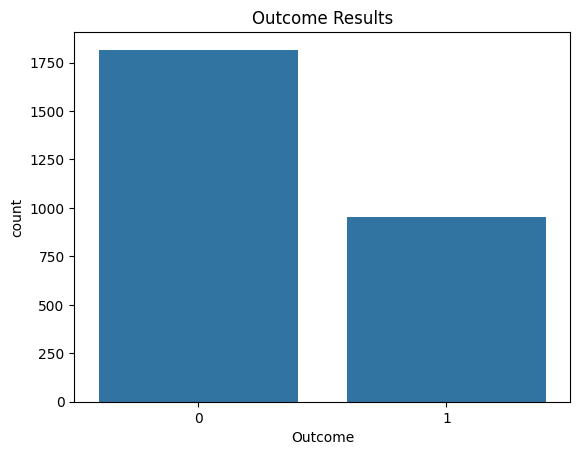

In [ ]:
# Outcome distribution
sns.countplot(x=df['Outcome'])
plt.title('Outcome Results')
plt.show()

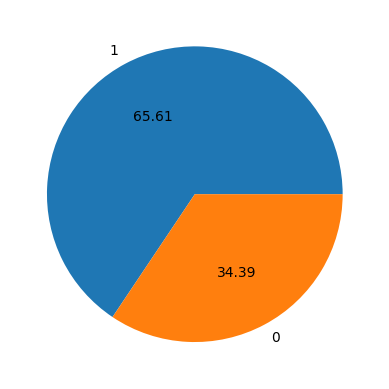

In [ ]:
plt.pie(df.groupby(by=["Outcome"]).size(), labels=df["Outcome"].unique(), autopct="%0.2f")
plt.show()

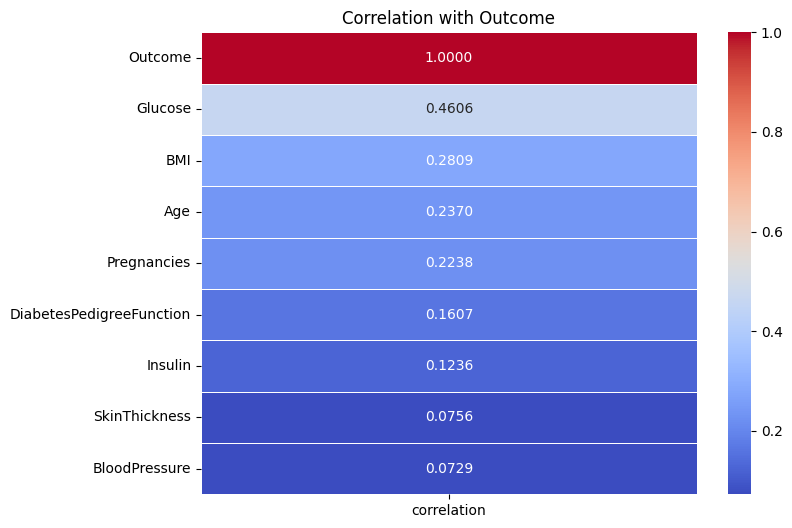

In [ ]:
# Correlation analysis
corr = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr, columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

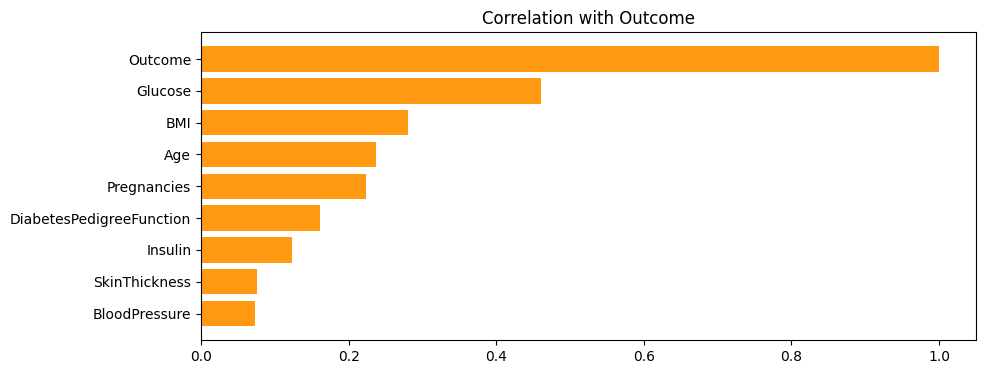

In [ ]:
corr = plt.figure(figsize=(10, 4))
outcome_corr = pd.DataFrame(df.corr()['Outcome'].sort_values(ascending=True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'], color="#FF9912")
plt.title('Correlation with Outcome')
plt.show()

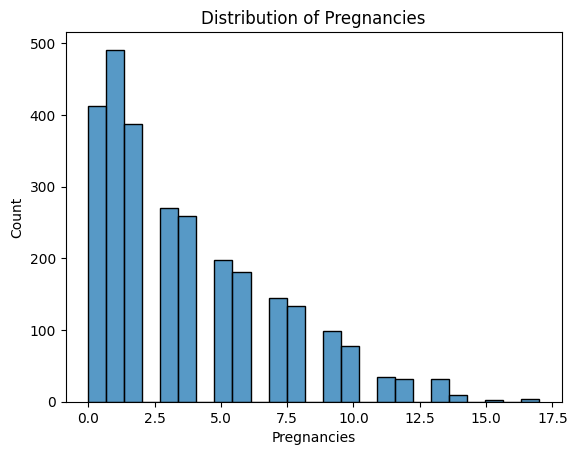

In [ ]:
# Feature distributions
sns.histplot(x=df.Pregnancies, bins=25)
plt.title('Distribution of Pregnancies')
plt.show()

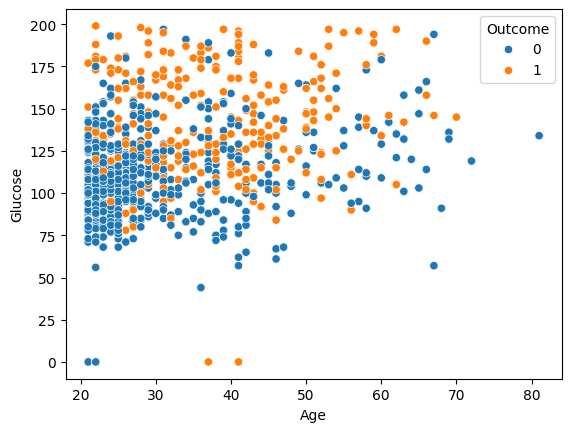

In [ ]:
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.show()

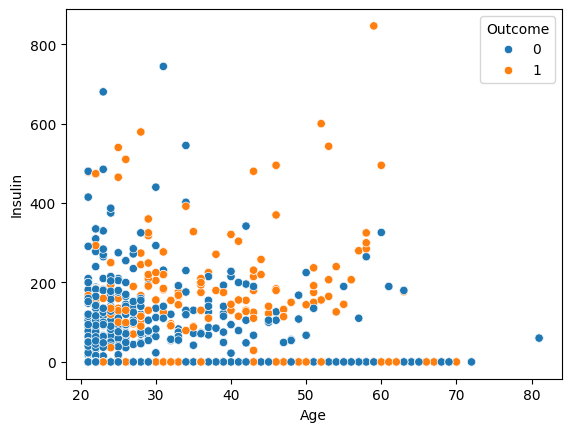

In [ ]:
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data=df)
plt.show()

Text(0.5, 1.0, 'Distribution of Glucose')

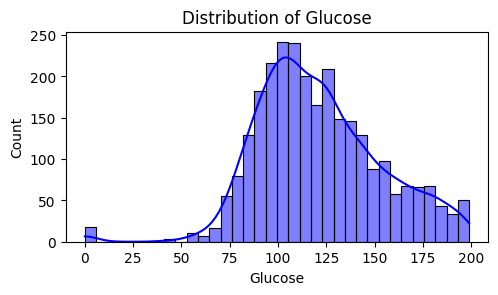

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

Text(0.5, 1.0, 'Distribution of BloodPressure')

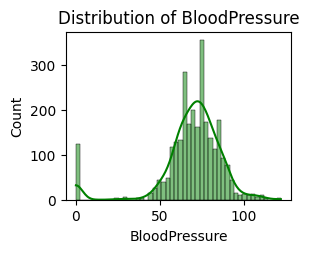

In [ ]:
plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')

Text(0.5, 1.0, 'Distribution of BMI')

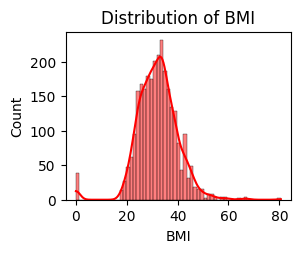

In [ ]:
plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Distribution of Insulin')

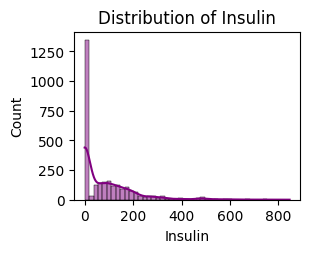

In [ ]:
plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
num_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10, 20))

<Figure size 1000x2000 with 0 Axes>

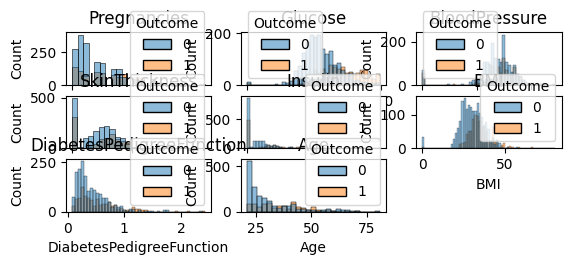

In [ ]:
for i in range(len(num_list)):
    plt.subplot(6, 3, i + 1)
    plt.title(num_list[i])
    sns.histplot(data=df, x=df[num_list[i]], hue='Outcome')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

***Data Preprocessing***

In [ ]:
# Feature selection
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

***Decision Tree Classifier***

In [ ]:
DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train, y_train)
DT_pred = DT_model.predict(X_test)
DT_acc = accuracy_score(y_test, DT_pred)
print(f"Decision Tree Accuracy: {DT_acc}")
print(classification_report(y_test, DT_pred))

Decision Tree Accuracy: 0.9915764139590855
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      1.00      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



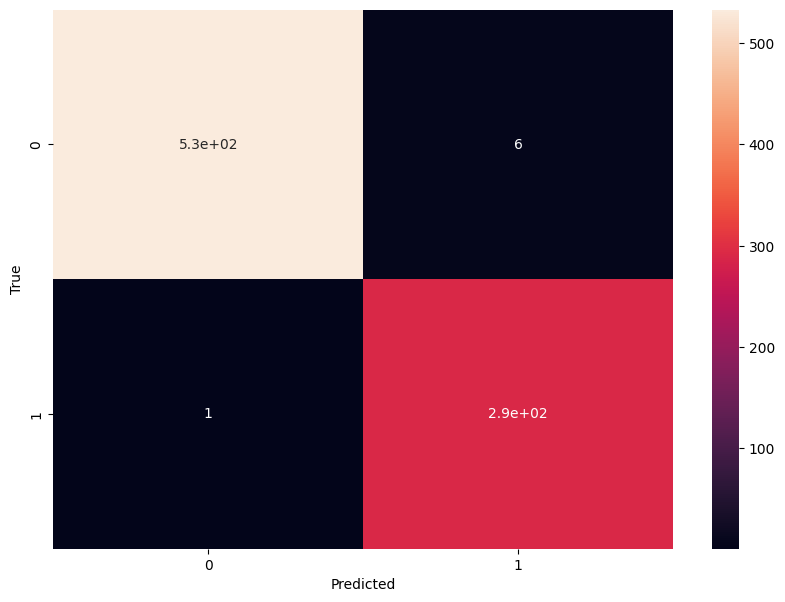

In [ ]:
cm2 = confusion_matrix(y_test, DT_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

***Support Vector Machine (SVM)***

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
print(f"SVM Accuracy: {svc_acc}")
print(classification_report(y_test, svc_pred))

SVM Accuracy: 0.7593261131167268
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       539
           1       0.72      0.51      0.60       292

    accuracy                           0.76       831
   macro avg       0.75      0.70      0.71       831
weighted avg       0.75      0.76      0.75       831



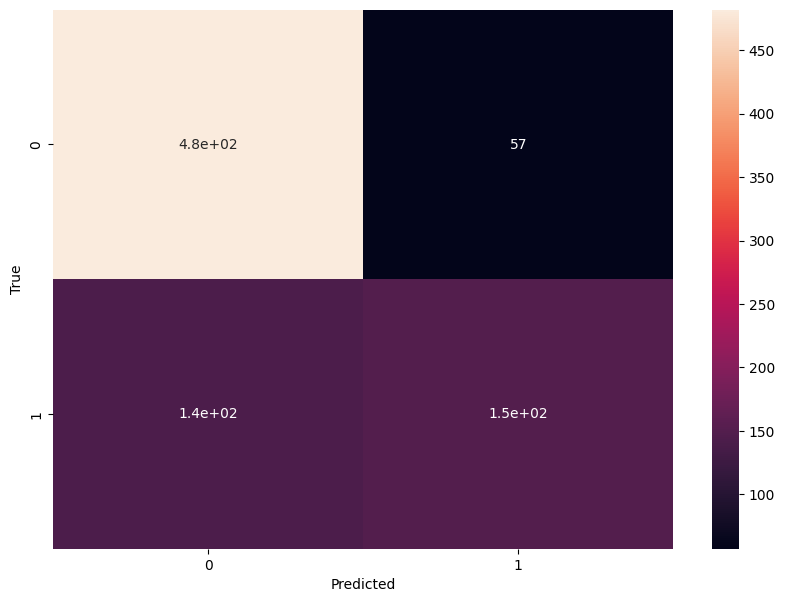

In [ ]:
cm2 = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

***Random Forest Classifier***

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
RF_acc = accuracy_score(y_test, RF_pred)
print(f"Random Forest Accuracy: {RF_acc}")
print(classification_report(y_test, RF_pred))

Random Forest Accuracy: 0.9903730445246691
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      0.99      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



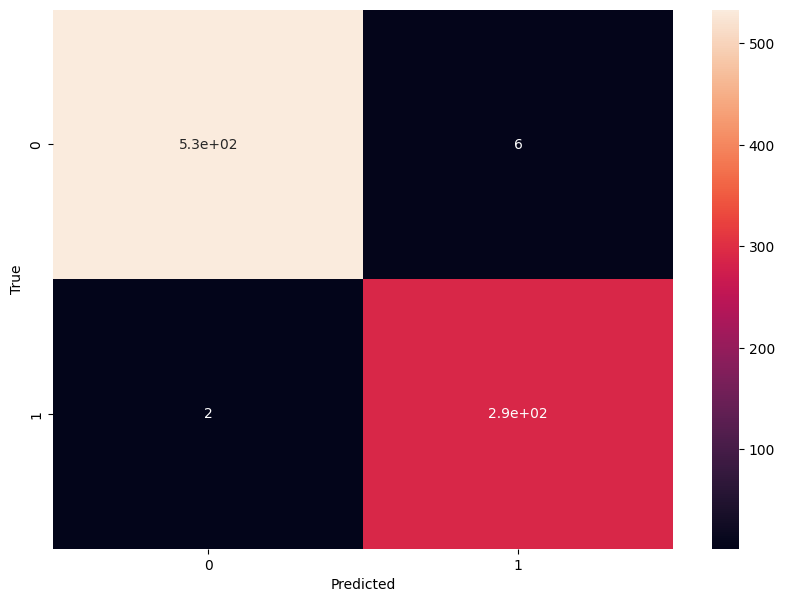

In [ ]:
cm3 = confusion_matrix(y_test, RF_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

***Conclusion: Model Scores***

In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'Random Forest'],
    'Accuracy': [DT_acc, svc_acc, RF_acc]
})
models.sort_values(by='Accuracy', ascending=True, inplace=True)
print(models)

           Model  Accuracy
1            SVM  0.759326
2  Random Forest  0.990373
0  Decision Tree  0.991576


In [ ]:
# Final model selection
print("As the score of the Decision Tree is the highest, we can select the Decision Tree for model training.")

As the score of the Decision Tree is the highest, we can select the Decision Tree for model training.
